# Multivariate Analysis of Fuel Economy in Petroleum Fueled Cars

Caleb Clough

CSPB 3022

May 3, 2021

### What this project is about:

This project aims to analyze a multivariate dataset from fueleconomy.gov to predict fuel economy for a given combination of vehicle characteristics, and to determine what characteristics most contribute to improved fuel economy.
Although electric/plug-in hybrids are increasing in market share, there is still extensive petroleum (gasoline and diesel) infastructure in the United States, and high demand for petroleum powered vehicles. Given this current (although decreasing) proliferation of purely petroleum-fueled vehicles, understanding how to optimize vehicle design for fuel economy is critical for combatting climate change in the interim. This project aims to approach this task using machine learning regression techniques.
    
### Problem Type:

Regression. Given the continious nature of the fuel economy (MPG) data that this project aims to predict, this project is clearly in the regression camp, although there will be categorical variables that are included in the analysis.

### Data Source:

The EPA's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan tests new passanger vehicles for fuel economy, and has data for model years 1984-2021. This data is freely available as a .csv to the general public at the following link:

https://www.fueleconomy.gov/feg/download.shtml

The header names in the raw csv are somewhat non-intuitive, but there is extensive documenation that accompanies the dataset, and defines this column headers at the following link:

https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle

### Data Description:

All Data is taken from the .csv listed above.

##### Original Data Set:

As shown below, the original dataset is quite extensive (27.2 Mb), with over 43000 total data points, and data recorded in over 82 columns. These columns comprise a mix of fuel economy data points, vehicle information, ratings specific to electric vehicles, and extensive cost-of-ownership projections. There is a mix of continous and categorical columns, and extensive NaN values dispersed throughout the data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
sns.set()

#Import Original Dataset
originaldataset = pd.read_csv('original_vehicles.csv')
originaldataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43418 entries, 0 to 43417
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        43418 non-null  float64
 1   barrelsA08       43418 non-null  float64
 2   charge120        43418 non-null  int64  
 3   charge240        43418 non-null  float64
 4   city08           43418 non-null  int64  
 5   city08U          43418 non-null  float64
 6   cityA08          43418 non-null  int64  
 7   cityA08U         43418 non-null  float64
 8   cityCD           43418 non-null  float64
 9   cityE            43418 non-null  float64
 10  cityUF           43418 non-null  float64
 11  co2              43418 non-null  int64  
 12  co2A             43418 non-null  int64  
 13  co2TailpipeAGpm  43418 non-null  float64
 14  co2TailpipeGpm   43418 non-null  float64
 15  comb08           43418 non-null  int64  
 16  comb08U          43418 non-null  float64
 17  combA08     

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Cleaned Data Set:
    
As will be described in a following section, the magnitude of this data was too large (and incomplete) to be useful. The following is a description of the cleaned data set:

In [2]:
#Import Cleaned Dataset
cleaneddataset = pd.read_csv('cleaned_vehicles.csv')
cleaneddataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4567 entries, 0 to 4566
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4567 non-null   int64  
 1   city08U                4567 non-null   float64
 2   co2TailpipeGpm         4567 non-null   int64  
 3   comb08U                4567 non-null   float64
 4   cylinders              4567 non-null   int64  
 5   displ                  4567 non-null   float64
 6   drive                  4567 non-null   int64  
 7   fuelCost08             4567 non-null   int64  
 8   fuelType               4567 non-null   object 
 9   ghgScore               4567 non-null   int64  
 10  highway08U             4567 non-null   float64
 11  make                   4567 non-null   object 
 12  model                  4567 non-null   object 
 13  automatictransmission  4567 non-null   int64  
 14  VClass                 4567 non-null   object 
 15  year

This reduced dataset has roughly 4600 data points, and 21 columns of data. City08U, comb08U, highway08U are columns representing fuel economy values (in miles per gallon). Cylinders, displ, drive, tCharger, sCharger, atvType, and startStop are columns represnting values describing the engine. Id, make, model, VClass, year, and mfrCode represent values describing the vehicle as a whole. transmission describes the transmission type. c02TailpipeGpm and ghgScore describe metrics pertaining to environmental impact. In total there are 5 continous variables (the 3 fuel economies, co2TailpipeGpm, and fuelCost08) and the rest are categorical (despite being listed as otherwise in the pandas data summary). Most of the cateogorical variables are ordinal, but there are a few categorical variables that are not: specifically make, model, Vclass, mfrcode, and id.

### Data Cleaning:

As mentioned previously, the original dataset from fueleconomy.gov had a few problems that required cleaning the dataset in order to have a suitable dataset to build a model from.

1. The timespan of data:

    The original dataset gives models from 1984 onwards. In addition to being a large dataset, analyzing this data would comprise a time-series, and is outside the scope of this course. As such, I simply chose the 5 most recent model years (assuming relatively small growth in petroluem-fueled engine technology over these years). All other data points were deleted.

2. The inclusion of hybrids/EVs:

    The original dataset included datapoints for hybrid and electric vehicles, as well as columns pertaining specifically to metrics unique to those two technologies. As the scope of this project is to analyze purely petroleum fueled vehicles, all related data points and columns were dropped from the dataset.

3. Rounded and incomplete data:

    The original dataset had rounded columns for the fuel economies. Given that this analysis will treat fuel economies as continous variables, these rounded columns do not serve any purpose (and would actually reduce the accuracy of the data). They were dropped. As well, there were a few columns that had very sparse data that was unable to be easily filled in. These were dropped.

4. Columns with NaNs:

    There were a few columns (tCharger, sCharger, and atvType) that while sparsely populated, were explicitly mentioned as having blanks in areas where the features they represent were not present in the vehicle. As such, I filled in each blank (NaN) with a "N" to complete the data.
    
5. Converting ordinal variables (qualitative predictors) to integers such that they are suitable for regression:

    There are a few columns that have ordinal data that I converted to integers such that they can be used in the regression. For instance I converted the transmission column to 1 for automatic transmissions and 0 for manuals.
    
6. Transformation of drivetrain type to wheels driven:

    This transformation was done such that the column for drivetrain becomes a numeric value suitable for regression.

After the cleaning was complete, the abridged dataset now has a manageable amount of datapoints, represents a small window of time, and has complete data in all columns. A few categorical variables were kept for the EDA in case needed, including manufacturer and model, although they will likely not be suitable for the regression due to the high number of values that they can take.

### EDA:

To begin, I predicted from the descriptions that Comb08U, representing combined city/highway fuel economy, would be the best target to train for to pursue the goal of this analysis--to find what factors affect fuel economy--but it first needs an EDA to confirm it truly is suitable.

I first wanted to take a look at the values of comb08U however to ensure that they data is relatively continous, and not skewed in any extreme ways I need to account for. A histogram is a good EDA tool to check this.

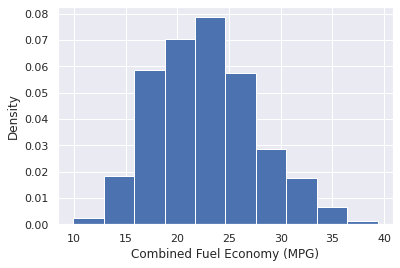

In [3]:
#Plot histogram of combined fuel economy
plt.hist(cleaneddataset.comb08U, density = True)
plt.ylabel('Density')
plt.xlabel('Combined Fuel Economy (MPG)');

##### Analysis:
As shown in the histogram, the data in this column appears to be suitable to be a regression target, with the data points showing a normal looking distribution centered around 22 MPG. The data does appear to be skewed somewhat right of a true normal distribution, however there appears to be ample data to train, with no notable extremes present at first glance.

To confirm that there are no outlying data points however, and to get a sense of the overall distribution, I then looked at a boxplot of the data:

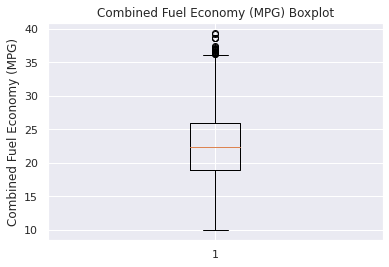

In [4]:
#Plot boxplot of combined fuel economy
plt.boxplot(cleaneddataset.comb08U);
plt.title('Combined Fuel Economy (MPG) Boxplot')
plt.ylabel('Combined Fuel Economy (MPG)');

##### Analysis:
This boxplot shows that, as predicted above, the median is around 22 MPG, with a relatively even IQR of 19 to 26. The boxplot does identify a few outlying values, but upon second glance, and in correlation with the histogram above, they appear to be valid data points despite being marked as outliers, and will be kept.

Next, I want to check to be sure that Comb08U is truly the centered fuel economy value, representing the "average" performance of a vehicle as compared to the other fuel economy values. In order to find this, a side by side boxplot is a good tool:

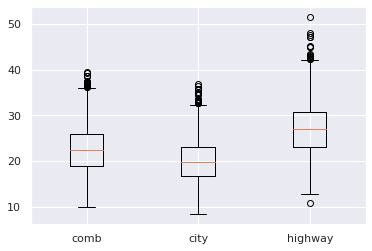

In [5]:
#Plot boxplots of all fuel economy
plt.boxplot(cleaneddataset[['comb08U','city08U','highway08U']]);
plt.xticks([1,2,3],['comb','city','highway']);

##### Analysis: 
As predicted, the Comb08U median value is inbetween that of City08U and Highway08U as shown in the boxplot, so this does appear to be the "average" performance, as desired.

With this target confirmed, I wanted to see what values seem to be highly correlated with city08U values. A correlation matrix is a good tool for this.

In [6]:
#Display correlation matrix
print(cleaneddataset.corr())

                             id   city08U  co2TailpipeGpm   comb08U  \
id                     1.000000 -0.025124        0.058359 -0.041317   
city08U               -0.025124  1.000000       -0.943103  0.991904   
co2TailpipeGpm         0.058359 -0.943103        1.000000 -0.952829   
comb08U               -0.041317  0.991904       -0.952829  1.000000   
cylinders              0.026542 -0.797778        0.842832 -0.783192   
displ                  0.027437 -0.826373        0.856107 -0.812274   
drive                  0.039351 -0.247397        0.236696 -0.267290   
fuelCost08             0.050159 -0.891413        0.925516 -0.889329   
ghgScore              -0.050958  0.962064       -0.952851  0.970672   
highway08U            -0.069329  0.940264       -0.931560  0.974352   
automatictransmission  0.068945 -0.115073        0.128001 -0.131598   
year                   0.959585  0.006022        0.017446 -0.007025   
tCharger               0.048328  0.096964       -0.135315  0.101037   
sCharg

##### Analysis:
    
It appears the highway and city fuel economy values are extremely highly correlated to the comb08U value, which makes sense given that they are likely the constituents of the equation to calculate combined fuel economy.

As well, the c02TailpipeGPM, ghgScore, and fuelcost08 are all extremely correlated to the comb08U value, likely being direct functions of the fuel economy themselves.

Id and Year appear highly uncorrelated, which also makes sense, given that the year range has been purposefully truncated to avoid time-series effects, and ID is arbitrary.

Everything else is correlated to a varying degree.

##### Conclusion/Discussion:  

As mentioned above it appears that comb08U is a good target to achieve the goal of this analysis, as it is not widely skewed, has ample data points, and is the "average" fuel economy value in the dataset.

In terms of parameter selection, in order to avoid simply predicting based on colinear variables, the other fuel economy values as well as 02TailpipeGPM, ghgScore, and fuelcost08 are not good candidates, and ID and year are almost wholly uncorrelated and thus not good candidates. StartStop is extremely weakly negatively correlated, and does not appear to be a good candidate.

Out of the remainder, the top parameters by correlation coefficient (absolute value) in order are displ, cylinders, drive, sCharger, automatictransmission, and tCharger. Out of these 6 parameters, seems like these all could possibly input parameters to predict the target value.

As such, the parameters that won't be used are going to be dropped from the dataset, leaving only the target and those 6 possible parameters.

In [7]:
#Remove columns that will not be used.
cleaneddataset = cleaneddataset.drop(columns=['city08U','co2TailpipeGpm','fuelCost08','ghgScore','highway08U','year','startStop'])

### Plan For Model Approach:

This data and the goal for this model clearly call for a multi-linear regression. The reason why this is a good choice is simply because there are many possible, non-colinear parameters (so a simple linear regression would not work), and given the magnitude of the number of parameters to train on, the simplicty of a multi-linear regression as opposed to quadratic or other regressions may simplify the training process. However, this will need to be explored more fully in future parts and possibly expanded upon if the model requires a better fit.

The multilinear model may have difficulties with overfitting if all 6 parameters are used, however, there is also evidence that each may meaningfully contribute to an accurate prediction. During the process of model fitting, this will need to be considered to prevent overfitting, while maximizing model usefulness.

### Preparation of Training and Test Data

In order to prevent issues with overfitting, we will take a cross validation approach throughout our model selection process. In order to do this, I will take two, equally sized samples from our data, and use one for training and the other for testing. 

In [8]:
#Find length of data
datasize = len(cleaneddataset)//2 

#Pull samples for the training and test datasets.
datatraining = cleaneddataset.sample(replace = False, n = datasize)
datatest = cleaneddataset.sample(replace = False, n = datasize)

#Display summaries of both datasets
print(datatraining.describe())
print(datatest.describe())

                 id      comb08U    cylinders        displ        drive  \
count   2283.000000  2283.000000  2283.000000  2283.000000  2283.000000   
mean   41108.936049    22.787837     5.573368     3.093517     2.907578   
std     1515.098684     4.947305     1.889876     1.329900     0.995938   
min    38552.000000     9.950200     3.000000     1.000000     2.000000   
25%    39779.000000    19.062000     4.000000     2.000000     2.000000   
50%    41068.000000    22.472000     6.000000     3.000000     2.000000   
75%    42395.000000    25.992800     6.000000     3.600000     4.000000   
max    43817.000000    39.379900    16.000000     8.000000     4.000000   

       automatictransmission     tCharger     sCharger  
count            2283.000000  2283.000000  2283.000000  
mean                0.883487     0.560666     0.044678  
std                 0.320910     0.496415     0.206641  
min                 0.000000     0.000000     0.000000  
25%                 1.000000     0.0000

### Adjusted R^2 Function and Allowed Factors

The below code defines the list of possible parameters, as well as a function to calculate adj r^2 given a model on test data-- for cross-validation purposes.

Throughout this project, adjusted R^2 will be treated as the main evaluation metric to determine model quality. The reason this was chosen is because of easy interpretability/comparability between runs, and a general familarity of an R^2 metric among people who have done regressions in the past. Going further, adjusted R^2 penalizes overly complex models and helps avoid overfitting, which it was it was chosen over non-adjusted R^2.

In [9]:
#Create list of allowed factors
allowed_factors = ['cylinders','displ','drive','automatictransmission','tCharger','sCharger']

#Take model, data, and number of parameters, and return adj r^2 according to equation defined in class.
def testadjr2(model,testdata,p):
    y_bar = (np.average(testdata.comb08U))
    y_i = testdata.comb08U
    y_i_hat = model.predict(testdata)
    n = len(testdata.comb08U)
    
    r2 = 1-(np.sum((y_i-y_i_hat)**2)/np.sum((y_i-y_bar)**2))
    adjr2 = 1 - ((1-r2)*(n-1)/(n-p-1))
    
    return adjr2

In [10]:
print(allowed_factors)

['cylinders', 'displ', 'drive', 'automatictransmission', 'tCharger', 'sCharger']


### ML Model 1: Linear Regression

To begin, we will iterate over all of the allowed factors and find the best simple linear regression:

In [11]:
#Initial output lists
adjrsquareds = []
testadjrsquareds = []
bestfactor, bestfactorname = 0, 'empty'

#Loop through each factor, remembering the best model (based on adj R^2)
for factor in allowed_factors:
    factorformula = 'comb08U ~ ' + factor
    f1 = smf.ols(formula=factorformula,data = datatraining).fit()
    if f1.rsquared_adj > bestfactor:
        bestfactor, bestfactorname = f1.rsquared_adj, factor
        bestmodel = f1

#Remove chosen "best factor" from list of factors and test against test dataset. Record results.
allowed_factors.remove(bestfactorname)
adjrsquareds.append(bestfactor)
testr2 = testadjr2(bestmodel,datatest,1)
testadjrsquareds.append(testr2)

print('Best model adj R^2: ',bestfactor)
print('Best model parameters: ',bestfactorname)
print('Test data adj R^2: ',testr2)

Best model adj R^2:  0.6614517668970226
Best model parameters:  displ
Test data adj R^2:  0.661210505259506


**Analysis:** This was simply a first attempt at creating a viable ML model, and it performs moderately well with the cross validation approach. Clearly there is more that can be done to increase the performance of the model, so the next step will be to look at a multi-linear regression technique

### ML Model 2: Multi-Linear Regression Using Forward Stepwise Selection

We have up to 6 parameters to choose from, so next we will find the best model based on adj R^2 for each amount of parameters.

In [12]:
#Loop through, each time adding a new parameter based on the forward stepwise selection algorithm
for i in [2,3,4,5,6]:
    bestfactornameprevious = bestfactorname + " + "
    bestfactor, bestfactorname = 0, 'empty'
    
    #Loop through each factor, remembering the best model (based on adj R^2)
    for factor in allowed_factors:
        factorformula = 'comb08U ~ ' + bestfactornameprevious + factor
        f1 = smf.ols(formula=factorformula,data = datatraining).fit()
        if f1.rsquared_adj > bestfactor:
            bestfactor, bestfactorname = f1.rsquared_adj, factor
            bestmodel = f1
    
    #Remove chosen "best factor" from list of factors and test against test dataset. Record results.
    allowed_factors.remove(bestfactorname)
    bestfactorname = bestfactornameprevious + bestfactorname
    adjrsquareds.append(bestfactor)
    testr2 = testadjr2(bestmodel,datatest,i)
    testadjrsquareds.append(testr2)

    print('Number of factors: ', i)
    print('Best model adj R^2: ',bestfactor)
    print('Best model parameters: ',bestfactorname)
    print('Test data adj R^2: ',testr2)
    print('~~~~~~~~~~~~~~~~~~~~~')

Number of factors:  2
Best model adj R^2:  0.7097430444924719
Best model parameters:  displ + tCharger
Test data adj R^2:  0.7011066216286719
~~~~~~~~~~~~~~~~~~~~~
Number of factors:  3
Best model adj R^2:  0.7334460834570748
Best model parameters:  displ + tCharger + drive
Test data adj R^2:  0.726726606512393
~~~~~~~~~~~~~~~~~~~~~
Number of factors:  4
Best model adj R^2:  0.7362435301980592
Best model parameters:  displ + tCharger + drive + sCharger
Test data adj R^2:  0.7315526724747088
~~~~~~~~~~~~~~~~~~~~~
Number of factors:  5
Best model adj R^2:  0.7363011537078088
Best model parameters:  displ + tCharger + drive + sCharger + automatictransmission
Test data adj R^2:  0.7318940372310166
~~~~~~~~~~~~~~~~~~~~~
Number of factors:  6
Best model adj R^2:  0.7362154072762572
Best model parameters:  displ + tCharger + drive + sCharger + automatictransmission + cylinders
Test data adj R^2:  0.7318082622228589
~~~~~~~~~~~~~~~~~~~~~


**Analysis:** As expected, the overall R^2 increases as parameters are added. However, the adjusted R^2 is maximized for p = 5. See graph below to illustrate this. The adjusted R^2 improves substantially with these additional parameters.


Training:  [0.6614517668970226, 0.7097430444924719, 0.7334460834570748, 0.7362435301980592, 0.7363011537078088, 0.7362154072762572]
Test:  [0.661210505259506, 0.7011066216286719, 0.726726606512393, 0.7315526724747088, 0.7318940372310166, 0.7318082622228589]


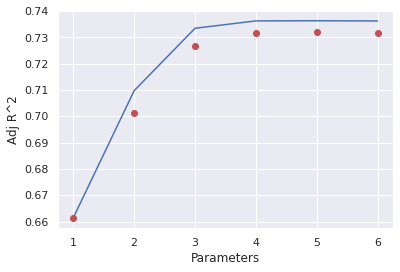

In [44]:
#Display test and training results
print("Training: ",adjrsquareds)
print("Test: ",testadjrsquareds)
xticks = np.linspace(1,6,6)

#Create visualization of results
plt.plot(xticks,adjrsquareds)
plt.plot(xticks,testadjrsquareds,'ro')
plt.xlabel('Parameters')
plt.ylabel('Adj R^2');

Next I will check the t-statistics and p-values on all of the parameters to see if all are statistically significant.

In [43]:
#Display summary of best model by R^2
best_mod = smf.ols(formula='comb08U~displ + tCharger + drive + sCharger + automatictransmission + cylinders',data = datatraining).fit()
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comb08U   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1062.
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        02:14:48   Log-Likelihood:                -5364.9
No. Observations:                2283   AIC:                         1.074e+04
Df Residuals:                    2276   BIC:                         1.078e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.2203      0.251    144.246      0.000      35.728      36.713
displ                    -3.1782      0.122    -25.968      0.000      -3.418      -2.938
tCharger                 -2.2123      0.129    -17.108      0.000      -2.466      -1.959
drive                    -0.7760      0.055    -14.115      0.000      -0.884      -0.668
sCharger                 -1.3201      0.266     -4.971      0.000      -1.841      -0.799
automatictransmission     0.2103      0.171      1.233      0.218      -0.124       0.545
cylinders                -0.0414      0.081     -0.510      0.610      -0.201       0.118
==============================================================================
Omnibus:                       29.801   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.830
Skew:                           0.268   Prob(JB):                     2.02e-07
Kurtosis:                       3.192   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** It appears that the 6th parameter, "cylinders", is not statistically significant due to its P-value being over 0.05. This corresponds nicely to the Adj R^2 indicating that the the models prediction of the test data is maximized when "cylinders" is removed. As such, we will remove that from the regression, and then rerun again to ensure no other parameters in this new model are statistically insignificant.

In [14]:
#Remove 'cylinders' from dataset
cleaneddataset = cleaneddataset.drop(columns=['cylinders'])

#Update model and display summary
best_mod = smf.ols(formula='comb08U~displ + tCharger + drive + sCharger + automatictransmission',data = datatraining).fit()
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comb08U   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1275.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        22:34:05   Log-Likelihood:                -5365.0
No. Observations:                2283   AIC:                         1.074e+04
Df Residuals:                    2277   BIC:                         1.078e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.1849      0.241    150.002      0.000      35.712      36.658
displ                    -3.2364      0.044    -73.560      0.000      -3.323      -3.150
tCharger                 -2.2404      0.117    -19.158      0.000      -2.470      -2.011
drive                    -0.7754      0.055    -14.109      0.000      -0.883      -0.668
sCharger                 -1.3162      0.265     -4.959      0.000      -1.837      -0.796
automatictransmission     0.2087      0.171      1.224      0.221      -0.126       0.543
==============================================================================
Omnibus:                       29.370   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.326
Skew:                           0.267   Prob(JB):                     2.60e-07
Kurtosis:                       3.183   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** With this rerun, all factors appear to be signficant, and the Adj. R^2 is now significantly improved from ML model 1.

However, there are still things that can be done. Next up, we will check for interaction between the terms.

### ML Model 3: Multi-Linear Regression With Interaction Terms

Next I've listed every possible combination of the 5 remaining terms below, and we will construct a huge model with all of them. From there, we will see which are stastically significant.

In [15]:
#All possible combos of the parameters
"""
displ * tCharger
displ * drive
displ * sCharger
displ * automatictransmission
tCharger * drive
tCharger * sCharger
tCharger * automatictransmission
drive * sCharger
drive * automatictransmission
sCharger * automatictransmission
"""

#Update model and display summary
best_mod = smf.ols(formula='comb08U~ displ * tCharger + displ * drive + displ * sCharger + displ * automatictransmission + tCharger * drive + tCharger * sCharger + tCharger * automatictransmission + drive * sCharger + drive * automatictransmission + sCharger * automatictransmission',data = datatraining).fit()
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comb08U   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     451.7
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        22:34:05   Log-Likelihood:                -5309.8
No. Observations:                2283   AIC:                         1.065e+04
Df Residuals:                    2267   BIC:                         1.074e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         41.5232      0.705     58.894      0.000      40.141      42.906
displ                             -4.1757      0.169    -24.653      0.000      -4.508      -3.844
tCharger                          -3.9020      0.463     -8.429      0.000      -4.810      -2.994
displ:tCharger                    -0.0107      0.091     -0.118      0.906      -0.189       0.168
drive                             -2.4385      0.256     -9.531      0.000      -2.940      -1.937
displ:drive                        0.2279      0.046      4.974      0.000       0.138       0.318
sCharger                          -9.1742      1.487     -6.172      0.000     -12.089      -6.259
displ:sCharger                     1.5302      0.218      7.008      0.000       1.102       1.958
automatictransmission             -2.6792      0.680     -3.937      0.000      -4.014      -1.345
displ:automatictransmission        0.2818      0.150      1.876      0.061      -0.013       0.576
tCharger:drive                     0.3951      0.120      3.289      0.001       0.160       0.631
tCharger:sCharger                  3.9114      0.976      4.007      0.000       1.997       5.826
tCharger:automatictransmission     0.6306      0.356      1.772      0.077      -0.067       1.329
drive:sCharger                     0.2539      0.310      0.819      0.413      -0.354       0.862
drive:automatictransmission        0.7821      0.207      3.780      0.000       0.376       1.188
sCharger:automatictransmission     0.1706      0.896      0.190      0.849      -1.586       1.927
==============================================================================
Omnibus:                       27.532   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.713
Skew:                           0.232   Prob(JB):                     3.53e-07
Kurtosis:                       3.312   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** Looks like there are 5 interaction terms that are statistically significant:
displ:drive, displ:sCharger, displ:automatictransmission, tCharger:drive, tCharger:sCharger.

We will now build a model with all of these terms, and check again for signicance.


In [18]:
#Update model and display summary
best_mod = smf.ols(formula='comb08U~displ + tCharger*sCharger + tCharger*drive + displ*drive + displ*sCharger + displ*automatictransmission',data = datatraining).fit()
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comb08U   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     671.4
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        22:34:37   Log-Likelihood:                -5319.5
No. Observations:                2283   AIC:                         1.066e+04
Df Residuals:                    2272   BIC:                         1.072e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      39.7366      0.567     70.069      0.000      38.624      40.849
displ                          -4.2358      0.157    -26.925      0.000      -4.544      -3.927
tCharger                       -3.5094      0.347    -10.110      0.000      -4.190      -2.829
sCharger                       -8.1408      1.012     -8.048      0.000     -10.124      -6.157
tCharger:sCharger               4.1808      0.949      4.403      0.000       2.319       6.043
drive                          -1.8232      0.186     -9.799      0.000      -2.188      -1.458
tCharger:drive                  0.4411      0.116      3.817      0.000       0.214       0.668
displ:drive                     0.2574      0.045      5.703      0.000       0.169       0.346
displ:sCharger                  1.5204      0.214      7.111      0.000       1.101       1.940
automatictransmission          -0.3321      0.392     -0.847      0.397      -1.101       0.437
displ:automatictransmission     0.2449      0.132      1.854      0.064      -0.014       0.504
==============================================================================
Omnibus:                       26.728   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.271
Skew:                           0.237   Prob(JB):                     7.26e-07
Kurtosis:                       3.271   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** It appears that automatic transmission is now not significant with these interaction terms-- it's effect likely is captured through the other interaction terms. As such, in order to simplify the model (and reduce risk of overfitting), I will re-run one last time with automatictransmission removed.

In [19]:
#Update model and display summary
best_mod = smf.ols(formula='comb08U~displ + tCharger*sCharger + tCharger*drive + displ*drive + displ*sCharger',data = datatraining).fit()
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comb08U   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     836.5
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        22:37:33   Log-Likelihood:                -5323.1
No. Observations:                2283   AIC:                         1.066e+04
Df Residuals:                    2274   BIC:                         1.072e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            39.4907      0.520     75.974      0.000      38.471      40.510
displ                -4.0490      0.130    -31.260      0.000      -4.303      -3.795
tCharger             -3.5013      0.347    -10.089      0.000      -4.182      -2.821
sCharger             -7.8778      1.007     -7.821      0.000      -9.853      -5.903
tCharger:sCharger     4.0938      0.950      4.310      0.000       2.231       5.956
drive                -1.8560      0.182    -10.186      0.000      -2.213      -1.499
tCharger:drive        0.4413      0.116      3.816      0.000       0.215       0.668
displ:drive           0.2740      0.044      6.252      0.000       0.188       0.360
displ:sCharger        1.4421      0.212      6.810      0.000       1.027       1.857
==============================================================================
Omnibus:                       24.646   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.853
Skew:                           0.229   Prob(JB):                     2.43e-06
Kurtosis:                       3.250   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** With automatic transmission removed. We now have a model that captures interactions, and performs better than either my 1st or 2nd models in terms of adj. R^2.

In [20]:
#Drop automatictransmission from dataset
cleaneddataset = cleaneddataset.drop(columns=['automatictransmission'])

While the model is already performing better, there is one more step I want to consider to possibly increase performance: consider non-linear effects.

### ML Model 4: Multi-Linear (With Polynomial Parameters) Regression With Interaction Terms

As one last iteration, I want to ensure the remaining terms we have appear linearly correlated to our target variable. Seaborn's pairplot is a great way to analyze this.

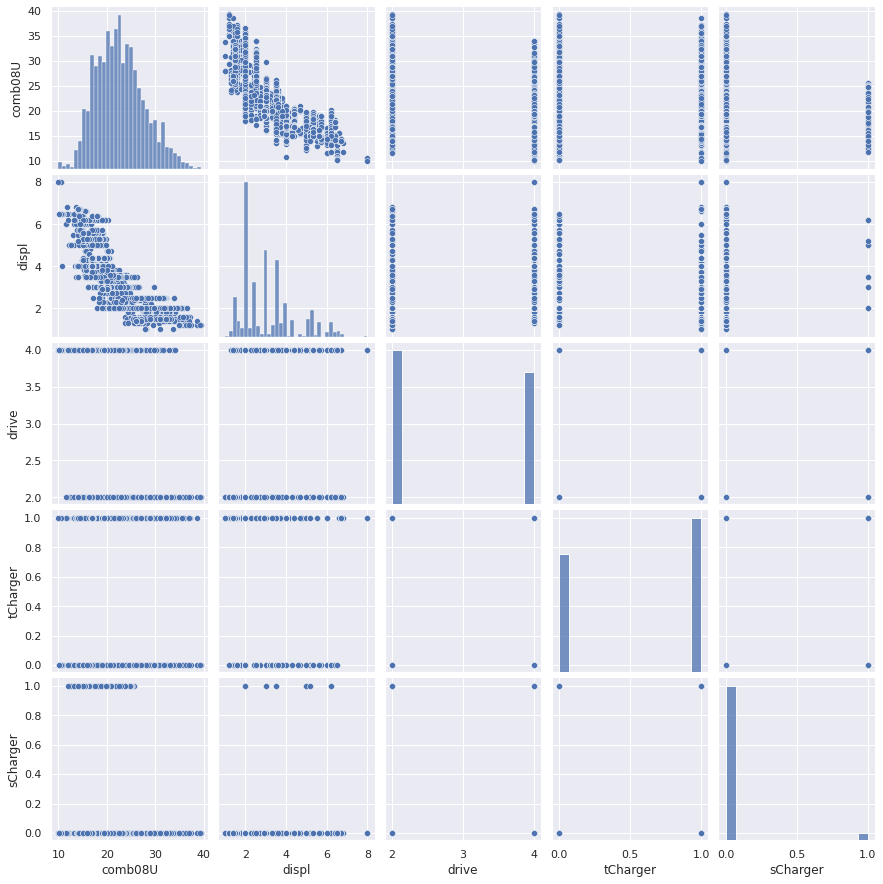

In [23]:
#Create pairplot, dropping the ID column from the data
sns.pairplot(cleaneddataset.drop(columns=['id']))

**Analysis:** This chart neatly shows that we now only have one quantitative variable remaining in our model: displ. However, it's also clear from this model that displ and our target, comb08U, are not quite linearly correlated. Infact, it looks like they may be quadratically correlated, and thus our model may benefit from having a non-linear term for displ.

We will try a quadratic term for displ next:

In [24]:
#Update model and display summary
best_mod = smf.ols(formula='comb08U~displ + I(displ ** 2) + tCharger*sCharger + tCharger*drive + displ*drive + displ*sCharger',data = datatraining).fit()
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comb08U   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     959.1
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        22:47:00   Log-Likelihood:                -5099.1
No. Observations:                2283   AIC:                         1.022e+04
Df Residuals:                    2273   BIC:                         1.028e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.6425      0.525     84.974      0.000      43.612      45.673
displ                -7.8926      0.209    -37.722      0.000      -8.303      -7.482
I(displ ** 2)         0.5480      0.025     22.197      0.000       0.500       0.596
tCharger             -3.4500      0.315    -10.963      0.000      -4.067      -2.833
sCharger             -4.1177      0.929     -4.433      0.000      -5.939      -2.296
tCharger:sCharger     1.3759      0.870      1.582      0.114      -0.330       3.082
drive                -1.3969      0.167     -8.390      0.000      -1.723      -1.070
tCharger:drive        0.3912      0.105      3.730      0.000       0.186       0.597
displ:drive           0.1926      0.040      4.828      0.000       0.114       0.271
displ:sCharger        0.5743      0.196      2.931      0.003       0.190       0.959
==============================================================================
Omnibus:                       16.126   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.207
Skew:                           0.109   Prob(JB):                     4.09e-05
Kurtosis:                       3.406   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** This additional quadratic term helps our model's performance quite a bit! This seems to be a good inclusion, however, this additional term seems to cover the effect of tCharger * sCharger, as this term is no longer stastically significant. As such we will remove that and rerun it.

In [25]:
#Update model and display summary
best_mod = smf.ols(formula='comb08U~displ + I(displ ** 2) + sCharger + tCharger*drive + displ*drive + displ*sCharger',data = datatraining).fit()
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comb08U   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1078.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        22:50:30   Log-Likelihood:                -5100.4
No. Observations:                2283   AIC:                         1.022e+04
Df Residuals:                    2274   BIC:                         1.027e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         44.6599      0.525     84.997      0.000      43.629      45.690
displ             -7.9200      0.209    -37.970      0.000      -8.329      -7.511
I(displ ** 2)      0.5535      0.024     22.638      0.000       0.506       0.601
sCharger          -3.1834      0.717     -4.439      0.000      -4.590      -1.777
tCharger          -3.4593      0.315    -10.991      0.000      -4.077      -2.842
drive             -1.3865      0.166     -8.331      0.000      -1.713      -1.060
tCharger:drive     0.4007      0.105      3.826      0.000       0.195       0.606
displ:drive        0.1887      0.040      4.737      0.000       0.111       0.267
displ:sCharger     0.3954      0.160      2.470      0.014       0.082       0.709
==============================================================================
Omnibus:                       15.858   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.866
Skew:                           0.107   Prob(JB):                     4.85e-05
Kurtosis:                       3.404   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:** With this removed, we have settled on a final model that appears to perform well. Next we will run this through a cross-validation approach to ensure it performs well on our test data as well.

### Cross Validation

Our training adjusted R^2 was calculated to be 0.791 for our final model, however, I want to ensure that this is recreated with the test data. Using the testadjr2 fucntion defined during our forward stepwise analysis, here is the result:

In [28]:
#Display adj r^2 using the final model on test data
print(testadjr2(best_mod,datatest,8))

0.7899526130667872


**Analysis:** This appears to be very close (slightly less, as expected) to our training data, so this indicates that our model is likely not overfit to the data, and would perform well in real life.

### Discussion/Conclusion

Overall the adj R^2 increased with every model, as shown below:

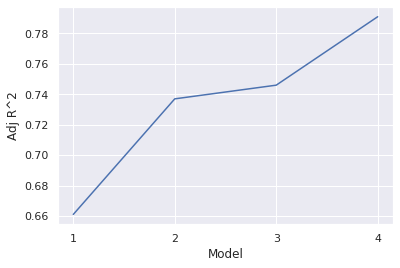

In [40]:
#Summary of data
x = [1,2,3,4]
y = [0.661,0.737,0.746,0.791]

#Display data summary
plt.plot(x,y);
plt.xlabel('Model')
plt.ylabel('Adj R^2')
plt.xticks(np.arange(1,5), ['1', '2', '3', '4']);

(Disclaimer: The above values are hard entered from when I ran this model, and may vary somewhat run to run, as the training and test sets are randomly sampled.)

To summarize:

* Model 1 was a basic linear regression, chosing just 1 parameter to use
* Model 2 extended Model 1 to a multilinear regression, using forward stepwise selection
* Model 3 extended Model 2 to include interaction terms between the variables
* Model 4 extended Model 3 to add quadratic term to better represent the relationship between the target and displ

As expected, increasing the number of variables and increasing the complexity of the model offered better results-- however, I do think my final model accurately reflects the underlying data, and the cross validation of the data acts as good evidence that this is the casee.

Although, the resulting model seems like a good fit, there are a few ways in which this model could possibly be improved if further analysis was done.

1. Segmentation of the vehicles based on whether they are performance vehicles or not could likely offer better models if each was run separately, as many of the outlying data points are sports cars. Alternatively, removal of these points could potentially assist in creating a better model as well.
2. The model could be checked for interaction terms multiplying 3 or more variables togehter, as many of the parameters deal with the engine and are likely correlated in to each other to some degree.
3. The parameters for the multilinear regression could be analyzed using a best subset selection method instead of forward stepwise selection, if adequate computing resources are available.

These changes would add complexity to the model and would need to be analyzed to ensure this complexity actually results in a better fit, but they could definitely be pursued if greater accuracy is needed.

All in all however, my final model only requires 4 parameters of input -- displ, tCharger, sCharger, and drive -- and can explain nearly 80% of the variance from the dataset mean. This seems to be a useful and powerful model for predicting fuel economy in new vehicles, likely allowing both consumers and designers more guidance when choosing and designing new vehicles. As such, my final model accomplishes the goals set for this project.